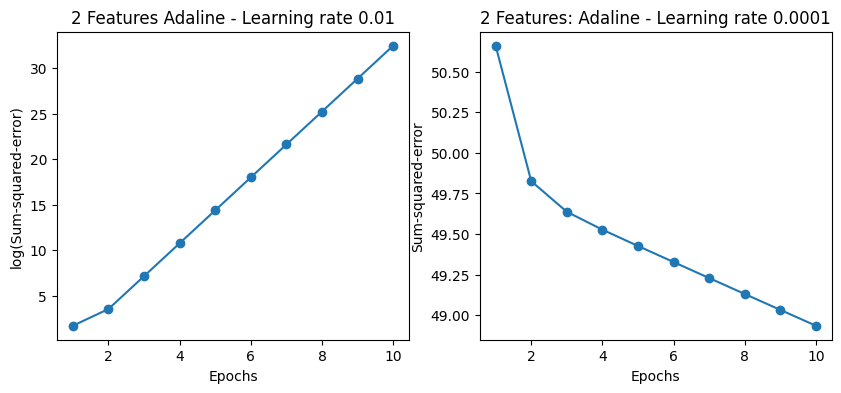

C:\Users\payge\AppData\Local\Temp\ipykernel_34288\772121849.py:92: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


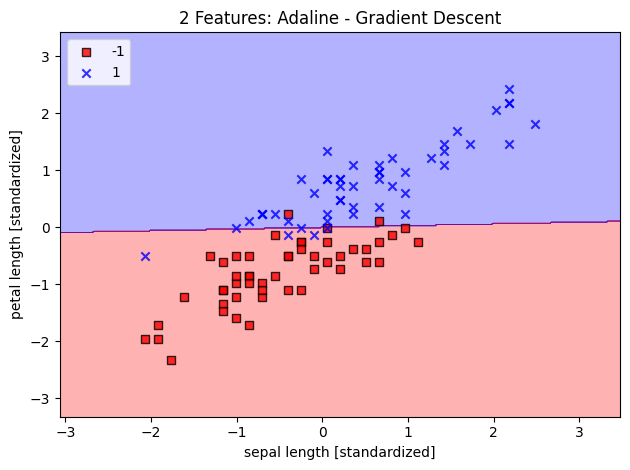

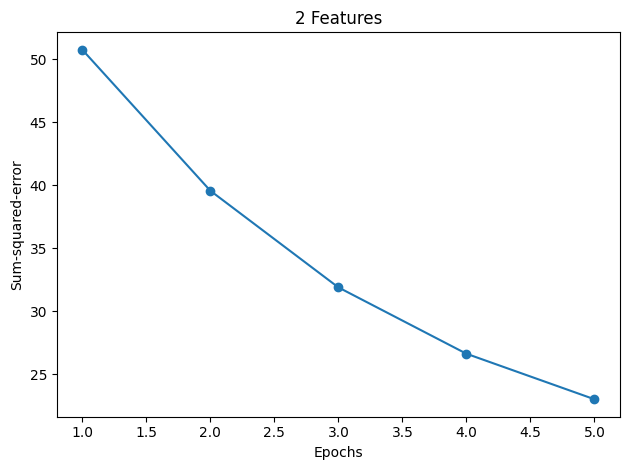

<Figure size 640x480 with 0 Axes>

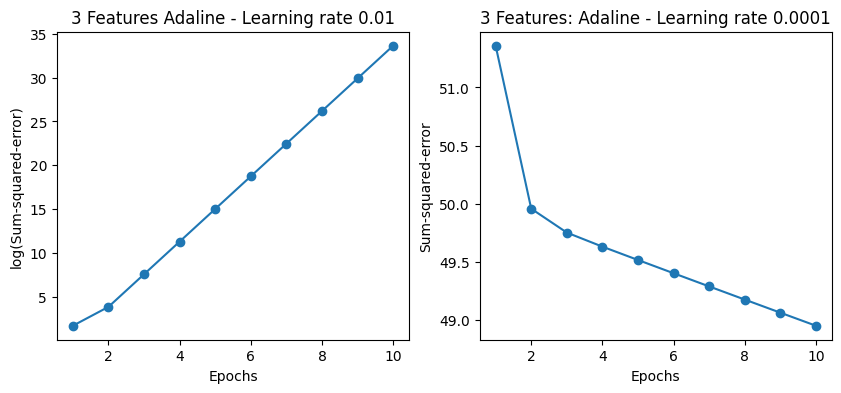

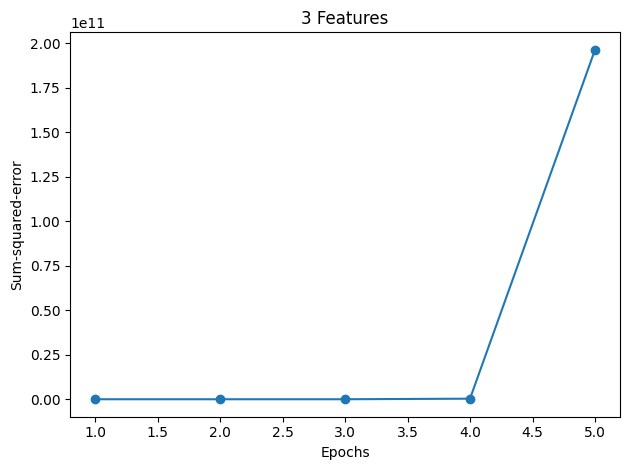

<Figure size 640x480 with 0 Axes>

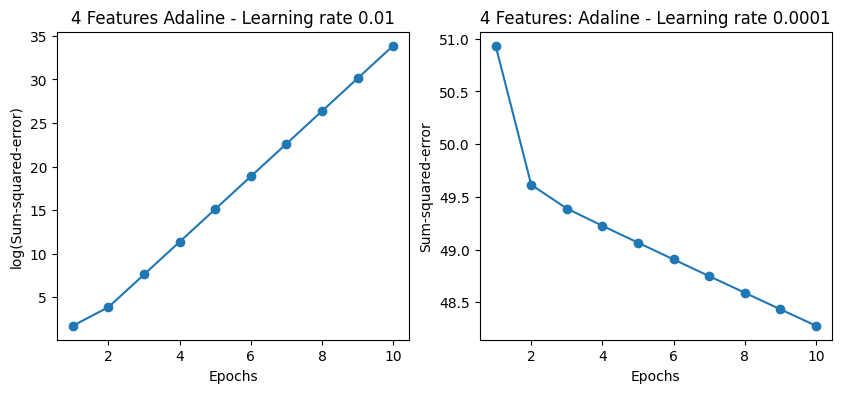

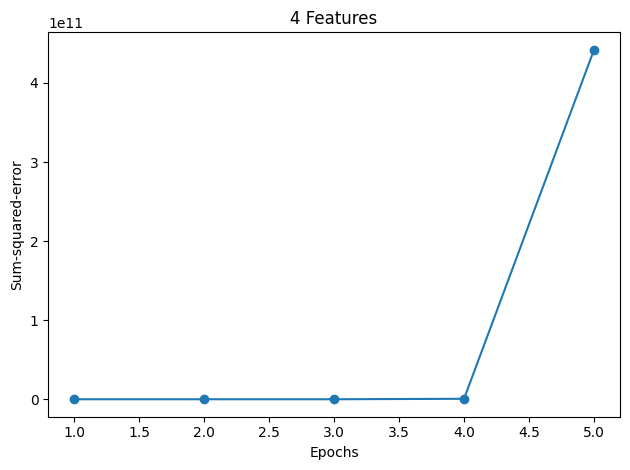

<Figure size 640x480 with 0 Axes>

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        # X = [[features], [features]....[features]]
        #self.w[:1] = array of all the weights [[weights],[weights],[weights]]
        #np.dot(x, self.w_[:1]) = sum of (x)(w)...(xn)(wn)
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        #X = net inputs
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))
                        >= 0.0, 1, -1)

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    #colors = ("red","blue", "lightgreen", 'gray', 'cyan')
    colors = ("red","blue")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.contourf(xx1, xx2, Z, alpha=0.3, colors=colors)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
         plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1], 
            alpha=0.8, 
            c=colors[idx], 
            marker=markers[idx], 
            label=cl, 
            edgecolor='black'
          )
         
def get_X_values(df, num):
    if num == 2:
        return df.iloc[50:150, [0,2]].values
    if num ==3:
        return df.iloc[50:150, [0,1,2]].values
    if num == 4:
        return df.iloc[50:150, [0,1,2,3]].values

def learning_rate(X,y):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
    ax[0].plot(
        range(1, len(ada1.cost_) + 1),
        np.log10(ada1.cost_), marker='o'
        )
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('log(Sum-squared-error)')
    ax[0].set_title(f'{num} Features Adaline - Learning rate 0.01')

    ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
    ax[1].plot(
        range(1, len(ada2.cost_) + 1),
        ada2.cost_, marker='o')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Sum-squared-error')
    ax[1].set_title(f'{num} Features: Adaline - Learning rate 0.0001')
    plt.show()


def feature_scaling(X, y, num):
    X_std = np.copy(X)
    X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
    X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    ada_gd = AdalineGD(n_iter=5, eta=0.01)
    ada_gd.fit(X_std, y)

    if num == 2:
        plot_decision_regions(X_std, y, classifier=ada_gd)
        plt.title(f'{num} Features: Adaline - Gradient Descent')
        plt.xlabel('sepal length [standardized]')
        plt.ylabel('petal length [standardized]')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()
    return ada_gd

def error_rate(ada_gd, num):
    plt.plot(
        range(1, len(ada_gd.cost_) + 1), 
        ada_gd.cost_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-squared-error')
    plt.title(f'{num} Features')
  
    plt.tight_layout()
    # plt.savefig('images/02_14_2.png', dpi=300)
    plt.show()

    plt.tight_layout()
    # plt.savefig('images/02_14_2.png', dpi=300)
    plt.show()


num = 2
datapath = 'C:\\Users\\payge\\OneDrive\\Desktop\\Grad School\\2023\\2023 Fall\\ML\\Environments\\Assignment 1\\iris.data'
df = pd.read_csv(datapath, header=None, encoding='utf-8')
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

for num in range(2,5):
    X= get_X_values(df, num) #2D array of flowers with their features. Example [[features], [features],[features]]
    
    learning_rate(X,y)
    ada_gd = feature_scaling(X,y, num)
    error_rate(ada_gd, num)